# **Exercicio Duelo de Modelos 4**

Nesta tarefa, vocês irão criar o seu próprio duelo de modelos, com o objetivo de superar os resultados apresentados em aula. O desafio é alcançar um desempenho superior ao que obtivemos, e para isso, será necessário aplicar todas as melhorias que vocês aprenderam ao longo dos módulos, utilizando a base de dados do Titanic.

**1. Escolha do Modelo:**
Selecione um dos modelos que foram explorados nos duelos de modelos ao longo do curso. Pode ser SVM, Random Forest, XGBoost, ou qualquer outro que tenhamos abordado.

**2. Aperfeiçoamento:**
**Aplique as técnicas que aprendemos para melhorar o desempenho do seu modelo:**

**Hiperparâmetros:** Utilize GridSearchCV ou RandomSearchCV para encontrar os melhores parâmetros.

**Cross Validation:** Avalie a robustez do modelo utilizando validação cruzada para garantir que ele generaliza bem.

**Balanceamento de Classes:** Se o seu modelo lida com problemas de classes desbalanceadas, explore técnicas como SMOTE, undersampling ou oversampling.

**Padronização e Normalização:** Lembre-se de padronizar os dados, especialmente se for usar modelos que são sensíveis à escala das variáveis.

**3. Submissão no Kaggle:**
Treine o seu modelo com os dados de treino e gere as previsões para os dados de teste. Lembre-se de que o conjunto de teste não possui a variável alvo (y_test), pois a avaliação será feita com base nas submissões no Kaggle.
Submeta suas previsões na competição do Titanic no Kaggle.

**4. Entrega:**
Envie o código que você desenvolveu, detalhando cada etapa do seu processo de modelagem, explicando as escolhas feitas e como essas ajudaram a melhorar o modelo.

Junto com o código, envie um print do seu score obtido na plataforma do Kaggle. Esse score será a sua métrica final de avaliação, mostrando como o seu modelo se compara com os demais.

**5. Competição Saudável:**
A ideia é trazer um senso de competição saudável, então não vale replicar exatamente o que fizemos na aula! Inove, explore novas combinações de parâmetros e técnicas, e mostre do que é capaz. O importante é exercitar o pensamento crítico e a capacidade de experimentar.

**Dicas Finais:**

Seja criativo e tenha um olhar crítico sobre o que pode ser melhorado.
Teste diferentes abordagens e não se prenda a um único caminho.
Lembre-se de que, mais do que alcançar o melhor score, o objetivo é aprender e aplicar o conhecimento de forma prática e eficaz.
Boa sorte! Estamos ansiosos para ver como cada um de vocês vai se sair nesse desafio e quais insights irão surgir dessa competição!

Ao final dessa atividade vocês terão participado da primeira competição publica de ciência de dados de vocês = )




In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')






In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_known
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,False,True,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,False,False,True,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,False,True,False,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,False,False,True,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,False,False,True,0


In [ ]:
# Preenchendo valores nulos em Age com a média
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [ ]:
# Codificar coluna "sex"
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Dividir e codificar usando One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [ ]:
# Para a variável 'Cabin', podemos apenas criar uma nova variável indicando se a cabine é conhecida ou não
train_df['Cabin_known'] = train_df['Cabin'].notna().astype(int)
test_df['Cabin_known'] = test_df['Cabin'].notna().astype(int)

# Agora podemos descartar a coluna 'Cabin' original
train_df = train_df.drop(columns=['Cabin'])
test_df_teste = test_df.drop(columns=['Cabin'])

In [ ]:
train_df = train_df.drop(columns=['Name','Ticket'])

In [ ]:
variaveis = ['Sex', 'Cabin_known','Fare','Pclass']

In [ ]:
# Separando as variáveis dependentes (Y) e independentes (X)
X = train_df[variaveis]
y = train_df['Survived']

X_test = test_df[variaveis]

In [ ]:
# Dimensionando os recursos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Aplicando SMOTE para balancear as classes nos dados de treinamento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Inicializar classificador XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Definindo a grade de parâmetros para GridSearchCV
param_grid = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV aos dados de treinamento reamostrados
grid_search.fit(X_resampled, y_resampled)

# Imprimindo os melhores parâmetros e a melhor pontuação
print("Melhores parâmetros encontrados: ", grid_search.best_params_)
print("Melhor precisão encontrada: ", grid_search.best_score_)

# Obtenha o melhor modelo
best_xgb_model = grid_search.best_estimator_

# Faça previsões sobre os dados de teste escalonados
y_pred = best_xgb_model.predict(X_test_scaled)

Melhores parâmetros encontrados:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 800, 'subsample': 0.8}
Melhor precisão encontrada:  0.8215317559153176


In [ ]:
# Criar um DataFrame de submissão
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})

#Salvar o DataFrame de envio em um arquivo CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


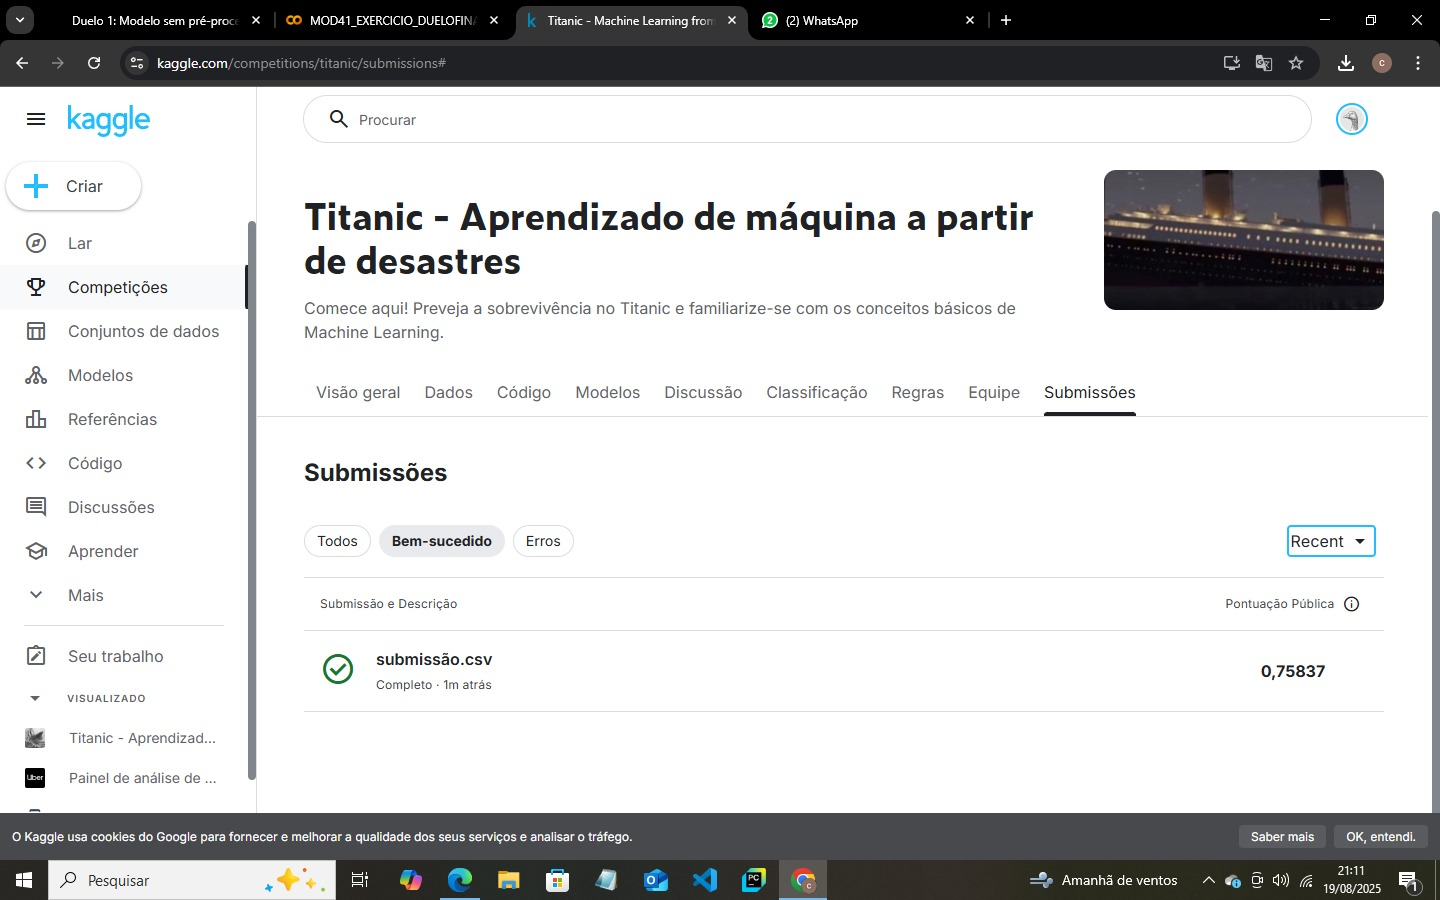![image.png]()